In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline 

In [2]:
df = pd.read_csv('/Users/aneruthmohanasundaram/Documents/GitHub/Machine_Learning/Machine Learning/Linear Regression /Linear Regression Project/Ecommerce.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


&lt;seaborn.axisgrid.JointGrid at 0x7fa52949b970&gt;

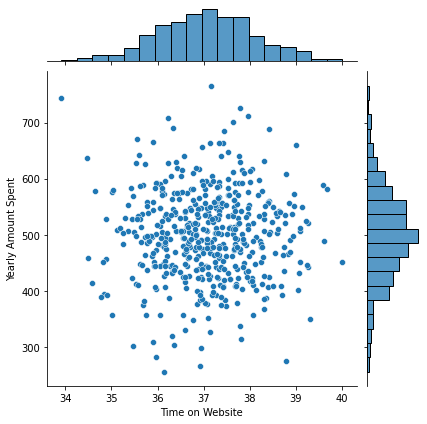

In [5]:
# Create a jointplot to compare the Time on Website and Yearly Amount Spent columns
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)

&lt;seaborn.axisgrid.JointGrid at 0x7fa529940370&gt;

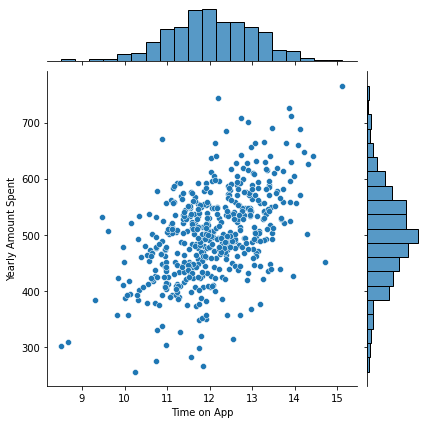

In [6]:
# Create a jointplot to compare the Time on App and Yearly Amount Spent columns
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

&lt;seaborn.axisgrid.JointGrid at 0x7fa529a773a0&gt;

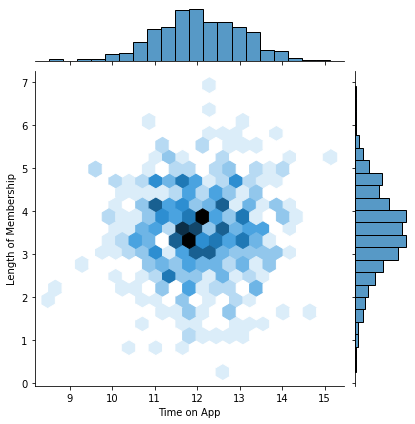

In [7]:
# create a 2D hex bin plot comparing Time on App and Length of Membership
sns.jointplot(x='Time on App',y='Length of Membership',data=df,kind='hex')

&lt;seaborn.axisgrid.PairGrid at 0x7fa529e641c0&gt;

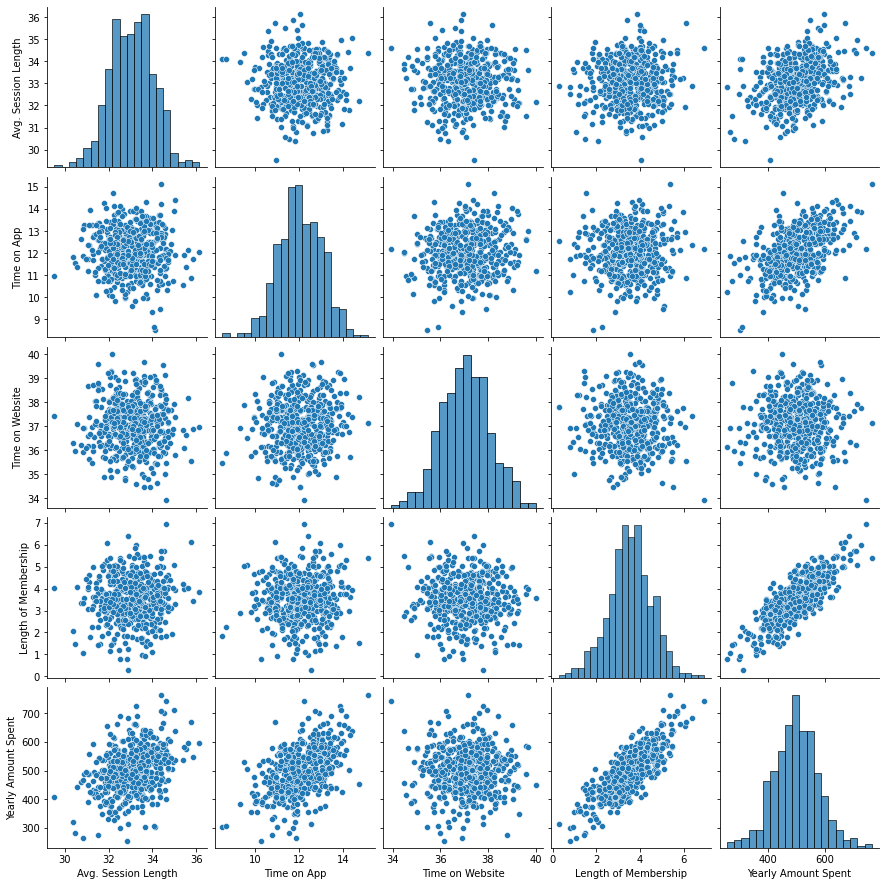

In [8]:
# To create a pairplot for the dataset
sns.pairplot(df)

&lt;seaborn.axisgrid.FacetGrid at 0x7fa52ae1ac40&gt;

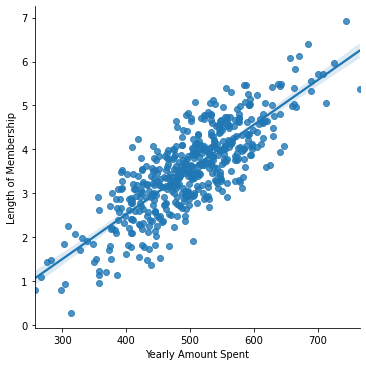

In [9]:
# linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=df)

In [10]:
###################################################### Training And Testing ###############################################################

In [11]:
df.columns

Index([&#39;Email&#39;, &#39;Address&#39;, &#39;Avatar&#39;, &#39;Avg. Session Length&#39;, &#39;Time on App&#39;,
       &#39;Time on Website&#39;, &#39;Length of Membership&#39;, &#39;Yearly Amount Spent&#39;],
      dtype=&#39;object&#39;)

In [17]:
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

y = df['Yearly Amount Spent']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
lm = LinearRegression()

In [21]:
# Train/fit lm on the training data
lm.fit(X_train,y_train)

LinearRegression()

In [22]:
# Print out the coefficients of the model
print('The Coefficent of the model is:',lm.coef_)

The Coefficent of the model is: [25.98154972 38.59015875  0.19040528 61.27909654]


In [23]:
################################################### Predicting the Model ##################################################################

In [26]:
# Predict the X_test set of the data
pre = lm.predict(X_test)

Text(0, 0.5, &#39;Predicted Y&#39;)

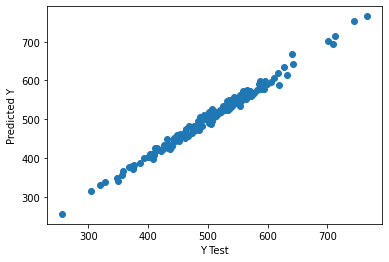

In [28]:
# Create a scatterplot of the real test values versus the predicted values
plt.scatter(y_test,pre)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [29]:
# Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

# To print the Mean Absolute Error Method 
print("MAE of our dataset is:",metrics.mean_absolute_error(y_test,pre))

# To print the Mean Square Error Method 
print("MSE of our dataset is:",metrics.mean_squared_error(y_test,pre))

# To print the Root Mean Square Error Method
print('RMSE of our dataset is:',np.sqrt(metrics.mean_squared_error(y_test,pre)))

MAE of our dataset is: 7.2281486534308295
MSE of our dataset is: 79.8130516509743
RMSE of our dataset is: 8.933815066978626


&lt;AxesSubplot:xlabel=&#39;Yearly Amount Spent&#39;, ylabel=&#39;Count&#39;&gt;

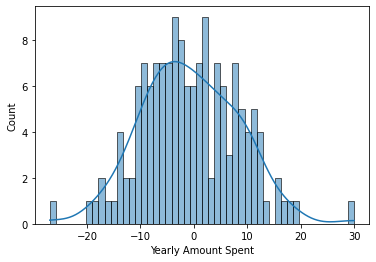

In [30]:
# Plot a histogram of the residuals
sns.histplot((y_test-pre),kde=True,bins=50) 

In [31]:
# Create a new DataFrame with respect to the X_train Columns 
col = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
col

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [ ]:
############################################################### End #######################################################################